https://www.peterkovesi.com/matlabfns/PhaseCongruency/Docs/convexpl.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


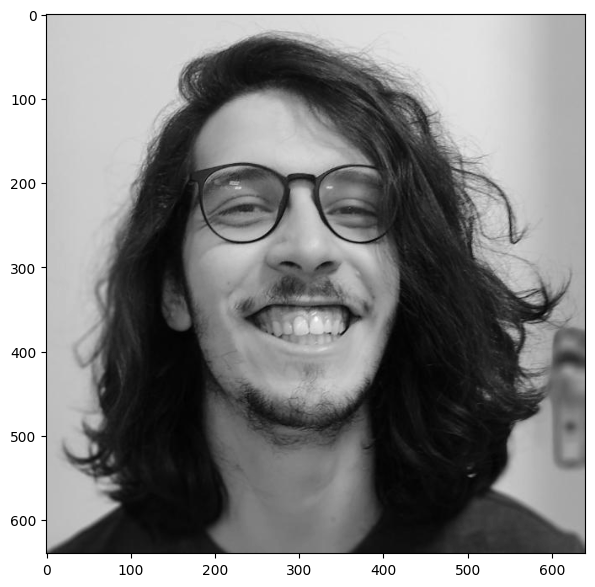

In [2]:
img_path = 'C:/Users/mathe/Desktop/Pastas/UFSCar/Perfil 5/PDI/Desenvolvimento/'
img_filename = 'Produtos_MatheusMazieiro.tiff'
#img_filename = 'White_circle_on_black_background.svg.png'

# Lê imagem e automaticamente converte para 1 canal de cinza
img = cv2.imread(img_path + img_filename, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[7,7])
plt.imshow(img, 'gray')

In [3]:
#Padding 
M, N = img.shape
img_padded = np.pad(img, ((0, M), (0, N)), 
                    mode='constant', constant_values=0)
P, Q = img_padded.shape


# Multiplicao por (-1)^(x+y)
mult_img = np.zeros([P, Q])
for x in range(P):
    for y in range(Q):
        mult_factor = (-1)**(x+y)
        mult_img[x, y] = img_padded[x, y] * mult_factor

# Converter imagem do domínio do espaço para o domínio da frequência
f = np.fft.fft2(mult_img)


In [4]:
#Definindo o filtro de gabor (trocar para log-gabor quando nescessario)
def logGabor(lamda, theta, psi, sigma, gamma, M, N):
    #cria o meshgrid radial
    (x, y) = np.meshgrid(np.arange(-N//2 + 1, N//2 + 1)/N, np.arange(-M//2 + 1, M//2 + 1)/M)
    radius = (x**2 + y**2)**.5
    radius[N//2][M//2] = 1


    #radial component
    wavelength = 30
    fo = 1/wavelength # desired filter wavelength
    logGabor = np.exp(-0.5 * (np.log(radius/fo)**2)/np.log(sigma)**2) # The bandwidth of the filter is controlled by the parameter sigma
    logGabor [N//2, M//2] = 0

    #print(logGabor)

    plt.title("Radial component")
    plt.imshow(logGabor, cmap='gray')
    plt.show()

    #frequency component
    theta = np.arctan2(-y, x)
    sinTheta = np.sin(theta)
    cosTheta = np.cos(theta)

    angl = 1
    thetaSigma = .75
    ds = sinTheta * np.cos(angl) - cosTheta * np.sin(angl)
    dc = cosTheta * np.cos(angl) + sinTheta * np.sin(angl)
    dtheta = abs(np.arctan2(ds, dc))
    
    spread = np.exp(-0.5 * (dtheta)**2/thetaSigma**2)
    plt.title("Spread component")
    plt.imshow(spread, cmap='gray')
    plt.show()

    #Combinign
    gab_filter = logGabor * spread
    plt.title("Spread component")
    plt.imshow(gab_filter, cmap='gray')
    plt.show()

    return gab_filter 

C:\Users\mathe\AppData\Local\Temp/ipykernel_13760/3202161085.py:12: RuntimeWarning: divide by zero encountered in log
  logGabor = np.exp(-0.5 * (np.log(radius/fo)**2)/np.log(sigma)**2) # The bandwidth of the filter is controlled by the parameter sigma


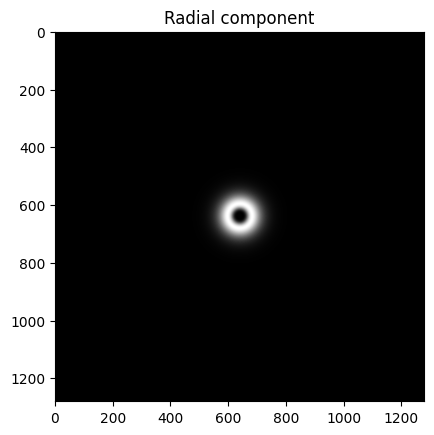

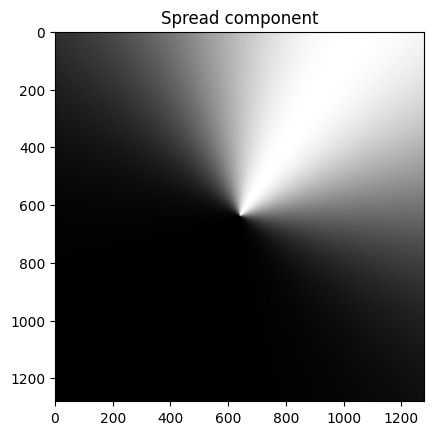

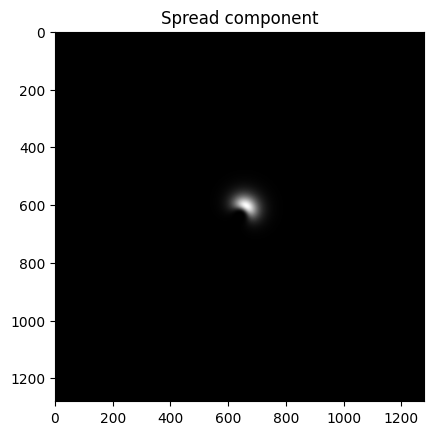

In [5]:
lb = 5
theta = 0 * (np.pi/180)
psi = 0
sg = 1.5#10
gm = .4

#Gera o filtro
gb = logGabor(lb, theta, psi, sg, gm, P, Q)




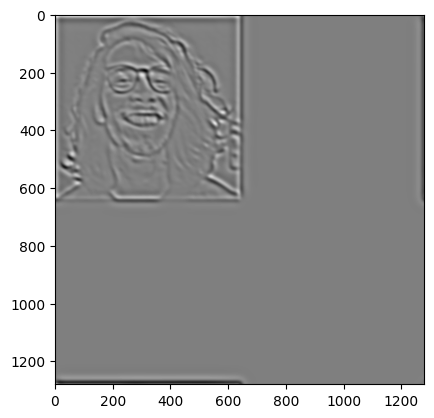

In [6]:
#G = H*F
Fimg_filtered = gb*f

#fft inversa
img_back = np.fft.ifft2(Fimg_filtered)

# Multiplicao por (-1)^(x+y)
mult_img_back = np.zeros([P, Q])
for x in range(P):
    for y in range(Q):
        mult_factor = (-1)**(x+y)
        mult_img_back[x, y] = img_back[x, y].real * mult_factor

plt.imshow(mult_img_back, cmap='gray')
plt.show()

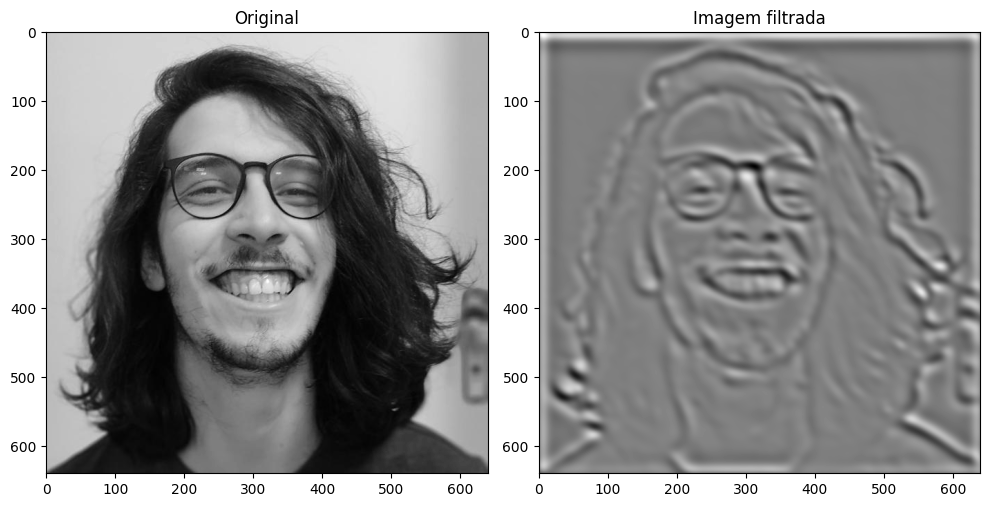

In [7]:
# Imagem do top-left quadrante 
final_img = mult_img_back[0:M, 0:N]

plt.figure(figsize=[10, 5.])

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(final_img, cmap='gray')
plt.title("Imagem filtrada")
plt.tight_layout()